In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift

In [19]:
# Parameters
size = 200
dt = 0.01
Nt = 40000

tau = 2.7339
eta = 2.0139
A_minus = 0.5*(eta-(eta**2-4)**0.5)/eta
B_minus = 0.5*(eta+(eta**2-4)**0.5)
a = eta*B_minus
lower_bound = 3*a-4+(8*a**2-24*a+16)**0.5
upper_bound = -8 + 11.65*a
print(a)
print(lower_bound)
print(upper_bound)

2.265744099354105
4.437632311950707
18.395918757475325


In [20]:
# Laplacian with periodic boundary conditions
def laplacian(Z):
    return (np.roll(Z, 1, axis=0) + np.roll(Z, -1, axis=0) +
            np.roll(Z, 1, axis=1) + np.roll(Z, -1, axis=1) -
            4 * Z)

In [21]:
epsilon2 = 100

In [22]:
# 全域非平凡稳态 A⁻, B⁻ + 小余弦扰动
phi = 0.01
qx = qy = 1

x = np.linspace(0, size, size, endpoint=False)
y = np.linspace(0, size, size, endpoint=False)
X, Y = np.meshgrid(x, y, indexing='ij')

# cos(qx x) * cos(qy y)
perturb = phi * np.cos(qx * X) * np.cos(qy * Y)
A = A_minus + perturb
B = B_minus + perturb

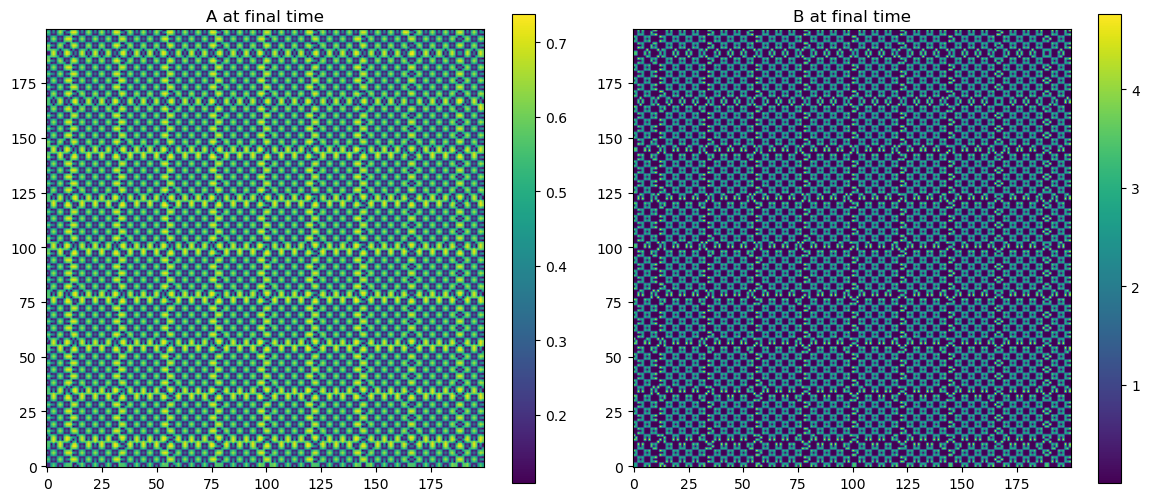

In [23]:
# Time evolution
for n in range(Nt):
    LA = laplacian(A)
    LB = laplacian(B)

    A_new = A + (LA + (1 - A) - B**2 * A) * dt
    B_new = B + (tau * (eta * B**2 * A - B + 1/epsilon2 * LB)) * dt
    A, B = A_new, B_new

# Plot final result
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("A at final time")
plt.imshow(A, cmap='viridis', origin='lower')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("B at final time")
plt.imshow(B, cmap='viridis', origin='lower')
plt.colorbar()

plt.tight_layout()
plt.show()

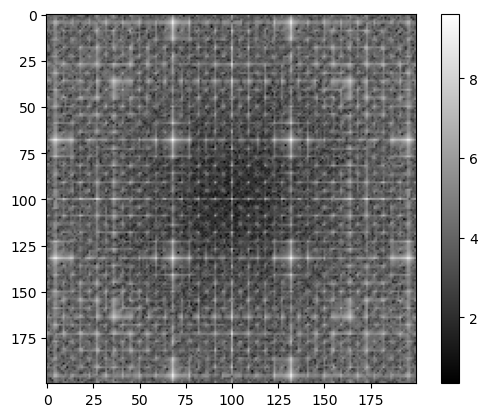

In [25]:
# 对初始B做FFT
F = fft2(B-B_minus)
F_shifted = fftshift(np.abs(F))

# 可视化频谱（对数尺度）
plt.imshow(np.log1p(F_shifted), cmap='gray')
plt.colorbar()
plt.show()